In [21]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
mpki_values = {}

In [23]:
# Parsing log files for baseline and different prefetch degrees
base_dir = "../output/"
log_files = {
    "baseline": "baseline/trace1_no_no.log",  # Log with no prefetcher
    "2": "task1/trace1_asp_degree-2.log",
    "4": "task1/trace1_asp_degree-4.log",
    "6": "task1/trace1_asp_degree-6.log",
    "8": "task1/trace1_asp_degree-8.log",
    "10": "task1/trace1_asp_degree-10.log",
}

In [24]:
# Function to parse a Champsim log file
def parse_champsim_log(log_file):
    with open(log_file, 'r') as file:
        log_data = file.read()

        # Find IPC
        mpki_match = re.search(r'STLB LOAD\s+.*\s+MPKI:\s+([\d\.]+)', log_data)
        mpki = float(mpki_match.group(1)) if mpki_match else 0

    return mpki

In [25]:
# Iterate through each log file and store MPKI values
for degree, log_file in log_files.items():
    mpki = parse_champsim_log(base_dir + log_file)
    mpki_values[degree] = mpki

In [26]:
mpki_values

{'baseline': 22.4811,
 '2': 22.2884,
 '4': 22.2556,
 '6': 22.2476,
 '8': 22.2491,
 '10': 22.2491}

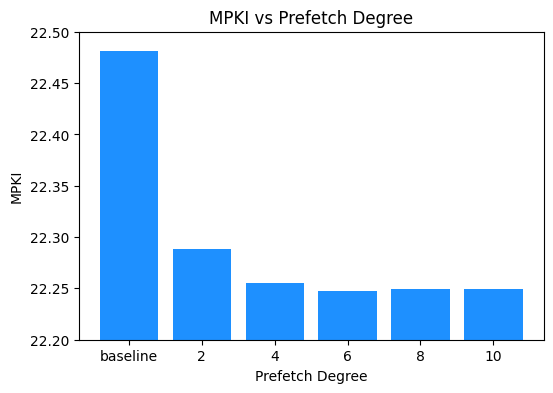

In [27]:
# Plotting graphs

# Bar plot for MPKI
plt.figure(figsize=(6, 4))
degrees = list(mpki_values.keys())
speedup = list(mpki_values.values())
plt.ylim(22.2, 22.5)
plt.title('MPKI vs Prefetch Degree')
plt.xlabel('Prefetch Degree')
plt.ylabel('MPKI')

plt.bar(degrees, speedup, color='dodgerblue')
plt.savefig("../graphs/task1-mpki.png")
# Show the plots
plt.show()
